In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import  pandas  as  pd 
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
import  seaborn  as  sns
from  sklearn.model_selection  import  train_test_split
from  sklearn.metrics  import  mean_squared_error
from  sklearn.preprocessing  import  StandardScaler 
from  sklearn.model_selection  import  GridSearchCV
from  sklearn.linear_model  import LinearRegression
from  sklearn.neighbors  import KNeighborsRegressor 
from  sklearn.ensemble  import RandomForestRegressor 
from  sklearn.ensemble  import GradientBoostingRegressor 
from  sklearn.ensemble  import AdaBoostRegressor 
from  sklearn.svm  import LinearSVR
from  sklearn.learning_curve  import  learning_curve
from  scipy  import  stats
from nltk.corpus import stopwords

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = os.getcwd();
PATH = PATH+"\\AV_Lord\\"

In [4]:
!dir {PATH}

 Volume in drive D is Local Disk
 Volume Serial Number is B408-A348

 Directory of D:\Github\fastai\courses\ml1\AV_Lord

25-Mar-18  12:42 AM    <DIR>          .
25-Mar-18  12:42 AM    <DIR>          ..
24-Mar-18  04:08 PM    <DIR>          .ipynb_checkpoints
24-Mar-18  06:53 PM        11,247,959 av_cat_2.csv
23-Mar-18  04:40 PM            58,415 campaign_data.csv
24-Mar-18  04:35 PM     1,382,961,456 combined.raw
25-Mar-18  09:23 AM        24,181,026 logistic_reg_sub2.csv
25-Mar-18  12:42 AM         3,748,609 logistic_reg_sub2.zip
24-Mar-18  12:07 AM         9,700,243 sample_submission.csv
23-Mar-18  04:42 PM        28,686,790 test_BDIfz5B.csv
23-Mar-18  07:55 PM        42,036,287 train.csv
               8 File(s)  1,502,620,785 bytes
               3 Dir(s)  168,866,631,680 bytes free


In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv',low_memory=False)

In [24]:
camp = pd.read_csv(f'{PATH}campaign_data.csv',low_memory=False)

In [25]:
df_raw.shape, camp.shape

((1023191, 6), (52, 9))

In [26]:
df_raw.get_ftype_counts(),\
camp.get_ftype_counts()

(int64:dense     4
 object:dense    2
 dtype: int64, int64:dense     5
 object:dense    4
 dtype: int64)

In [27]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [28]:
camp.head(2)

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...


In [ ]:
df[col].apply(lambda x: len(str(x).split(" "))#word count
              
df[col].str.len()#char count
              
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
df['avg_word'] = df[col].apply(lambda x: avg_word(x))
              
stop = stopwords.words('english')
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[col] = df[col].apply(lamda x: " ".join(x.lower() for x in split()))
df['removal_of_stopwords'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [21]:
freq = pd.Series(' '.join(camp['email_body']).split()).value_counts()[:10]
freq = list(freq.index)
camp['email_body'] = camp['email_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
camp['email_body'].head()

freq = pd.Series(' '.join(camp['email_body']).split()).value_counts()[-10:]
freq = list(freq.index)
camp['email_body'] = camp['email_body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
camp['email_body'].head()

0    Dear AVians, We are shaping up superb science ...
1    Dear AVians, Are your eager know what are upco...
2    Early Bird Pricing Till August 07  Save upto ...
3    Hi ? Before I dive into why should attend this...
4    Fireside Chat with DJ Patil - master is here! ...
Name: email_body, dtype: object

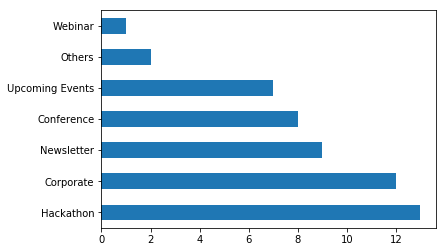

In [11]:
camp['communication_type'].value_counts().plot(kind='barh');

0    920401
1    102790
Name: is_open, dtype: int64


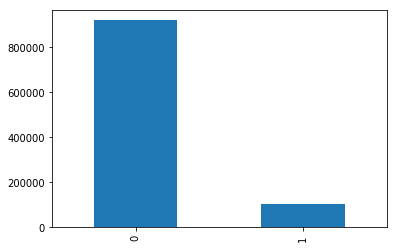

In [28]:
print(df_raw.is_open.value_counts())
df_raw['is_open'].value_counts().plot(kind='bar')

In [37]:
add_datepart(df_raw,'send_date')
df_raw.drop('send_Elapsed', axis=1, inplace=True)
df_raw.head(1)

,id,user_id,campaign_id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,send_Is_quarter_start,send_Is_year_end,send_Is_year_start
0,42_14051,14051,42,0,0,2017,1,2,9,0,9,False,False,False,False,False,False


In [38]:
train_cats(df_raw)

In [39]:
df_raw['user_id'].value_counts()

183177    20
145022    20
4118      19
216700    19
114180    19
197188    19
47152     19
163618    18
69970     18
196296    18
122065    18
218458    18
114075    18
38127     18
162109    18
67867     18
163399    18
156029    18
157374    18
36788     18
92799     18
49136     18
28463     18
160443    18
117705    18
86941     18
152991    18
143179    18
185773    18
111959    18
          ..
9258       1
1070       1
146480     1
60010      1
39524      1
48059      1
43618      1
156523     1
23463      1
21414      1
37685      1
230364     1
17199      1
134125     1
170356     1
182903     1
190842     1
178809     1
124304     1
85381      1
97281      1
171007     1
78593      1
228376     1
173048     1
185334     1
181236     1
2854       1
138223     1
188649     1
Name: user_id, Length: 168236, dtype: int64

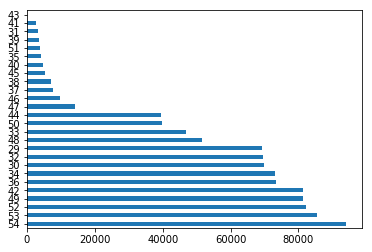

In [40]:
df_raw['campaign_id'].value_counts().plot(kind='barh');

In [42]:
df_raw.get_ftype_counts()

bool:dense         6
category:dense     1
int64:dense       10
dtype: int64

In [ ]:
df_raw['send_Month'].value_counts().plot(kind='bar')

In [43]:
df_raw.groupby('campaign_id')['is_click'].describe()

,count,mean,std,min,25%,50%,75%,max
campaign_id,,,,,,,,
29,69129.0,0.016549,0.127574,0.0,0.0,0.0,0.0,1.0
30,69756.0,0.012615,0.111608,0.0,0.0,0.0,0.0,1.0
31,3192.0,0.024436,0.154423,0.0,0.0,0.0,0.0,1.0
32,69624.0,0.010600,0.102409,0.0,0.0,0.0,0.0,1.0
33,46815.0,0.011449,0.106388,0.0,0.0,0.0,0.0,1.0
34,73112.0,0.009807,0.098544,0.0,0.0,0.0,0.0,1.0
35,4121.0,0.043921,0.204945,0.0,0.0,0.0,0.0,1.0
36,73415.0,0.004767,0.068882,0.0,0.0,0.0,0.0,1.0
37,7559.0,0.006482,0.080257,0.0,0.0,0.0,0.0,1.0


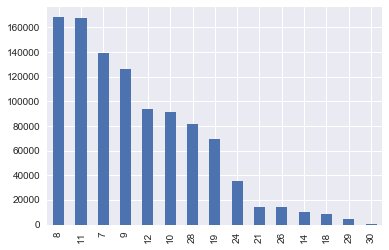

In [95]:
df_raw['send_Day'].value_counts().plot(kind='bar')

In [134]:
def code(url): return re.split('/', url)[3][:11]
def lexical_diversity(my_text_data):
    word_count = len(my_text_data)
    vocab_size = len(set(my_text_data))
    diversity_score = vocab_size / word_count
    return diversity_score

In [137]:
## Add features on camp df
camp['len_email_body'] = len(camp['email_body'])
camp['diversity_email_body'] = camp['email_body'].apply(lexical_diversity)
camp['diversity_subject'] = camp['subject'].apply(lexical_diversity)
camp['diversity_email_url'] = camp['email_url'].apply(lexical_diversity)
camp['body_per_sec'] = camp['len_email_body']/camp['no_of_sections']
camp['links_per_sec'] = camp['total_links']/camp['no_of_sections']
camp['img_per_sec'] = camp['no_of_images']/ camp['no_of_sections']
camp['code_email_url'] = camp['email_url'].apply(code)
camp['other_links'] = camp['total_links'] - camp['no_of_internal_links']
camp['av_links_percent'] = camp['no_of_internal_links'] / camp['total_links']

In [142]:
camp.drop(['email_body','email_url','subject'], axis=1,inplace=True)

In [ ]:
camp = pd.get_dummies(camp);camp.head(2)

In [154]:
df_raw = df_raw.merge(camp,on='campaign_id');
df_raw.head(1)

,id,user_id,campaign_id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,...,code_email_url_7wra6vb5p4c,code_email_url_7wrjo7b5p4c,code_email_url_7ww0uvb5p4c,code_email_url_7wx2s7b5p4c,code_email_url_7wxlqvb5p4c,code_email_url_7wxv87b5p4c,code_email_url_7wz6mvb5p4c,code_email_url_7wzpljb5p4c,code_email_url_7x08k7b5p4c,code_email_url_o7ohwml8lxh
0,42_14051,14051,42,0,0,2017,1,2,9,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
len(np.unique(df_raw['user_id']))

168236

In [164]:
test.head(1)

,id,campaign_id,user_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,send_Is_quarter_start,send_Is_year_end,send_Is_year_start
0,63_122715,63,122715,2018,1,1,2,1,2,False,False,False,False,False,False


In [67]:
df_raw.drop(['user_id', 'campaign_id'], axis=1, inplace=True);
df_raw.get_ftype_counts()

int32:dense      6
int64:dense     12
object:dense     2
dtype: int64

In [88]:
for s in np.unique(df_raw['communication_type']): 
    print ( s ,  '->' ,  hash ( s ) % 9)

Conference -> 8
Corporate -> 7
Hackathon -> 4
Newsletter -> 1
Others -> 5
Upcoming Events -> 0
Webinar -> 6


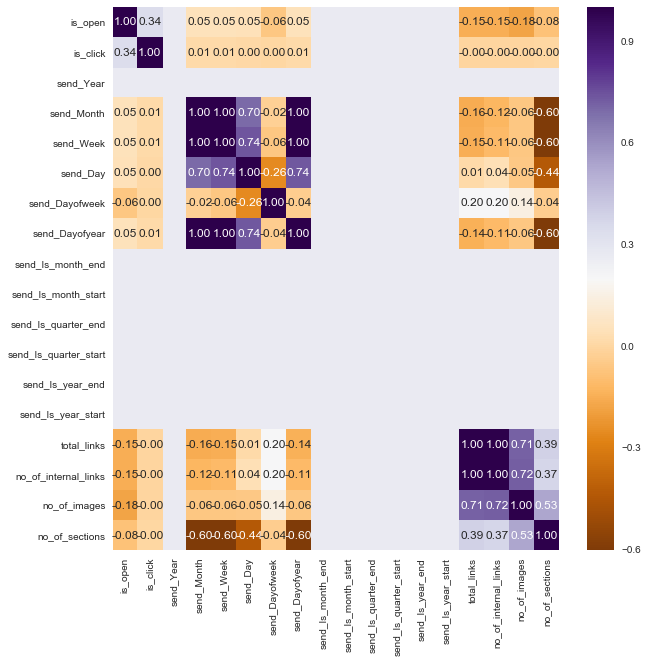

In [94]:
sns.set()
corr_matrix = df_raw.corr () 
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix , annot = True , fmt  =  ".2f" , cbar  =  True , cmap = 'PuOr');

df_raw['start_month'] = df_raw['send_Year']*100 + df_raw['send_Month']
df_raw['noon'] = np.where(np.logical_and(df_raw['start_hour']>11 , df_raw['start_hour']<=19),1,0)
df_raw['night'] = np.where(np.logical_and(df_raw['start_hour']>19, df_raw['start_hour']<24),1,0)

span_time = pd.concat([time_df['seconds'], time_df_test['seconds']])
df_raw['session_span'] = span_time

df_raw['session_span_per_n_uniques_sites'] = df_raw['session_span']/df_raw['n_unique_sites']

df_raw['hour_sin_x'] = df_raw['start_hour'].apply(lambda ts: np.sin(2*pi*ts/24.))
df_raw['hour_cos_x'] = df_raw['start_hour'].apply(lambda ts: np.cos(2*pi*ts/24.))""

In [175]:
y_target = df_raw['is_click'];
df_raw.head(1).T

,0
id,42_14051
user_id,14051
campaign_id,42
is_open,0
is_click,0
send_Year,2017
send_Month,1
send_Week,2
send_Day,9
send_Dayofweek,0


In [176]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/av_lord-raw')

In [29]:
df_raw = pd.read_feather('tmp/av_lord-raw')

In [134]:
df, y, nas, mapper = proc_df(df_raw, 'is_click', do_scale=True,max_n_cat=30)

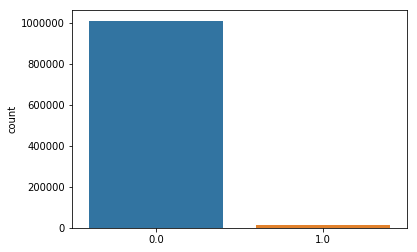

In [135]:
sns.countplot(y)

In [139]:
y[-26:] = 0

In [229]:
#df.drop('is_open', axis=1, inplace=True)
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.7547053047196518

In [141]:
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%%time m.fit(X_train, y_train)
print_score(m)

In [42]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

campaign_id              0.0
id                       0.0
is_click                 0.0
is_open                  0.0
send_Day                 0.0
send_Dayofweek           0.0
send_Dayofyear           0.0
send_Is_month_end        0.0
send_Is_month_start      0.0
send_Is_quarter_end      0.0
send_Is_quarter_start    0.0
send_Is_year_end         0.0
send_Is_year_start       0.0
send_Month               0.0
send_Week                0.0
send_Year                0.0
user_id                  0.0
dtype: float64

In [178]:
display_all(df.columns)

Index(['id', 'user_id', 'campaign_id', 'send_Year', 'send_Month', 'send_Week',
       'send_Day', 'send_Dayofweek', 'send_Dayofyear', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'email_body',
       'subject', 'email_url', 'link_diff', 'img_per_sec', 'link_diff_%',
       'img_per_section', 'user_id_na', 'is_open_na', 'send_Year_na',
       'send_Month_na', 'send_Week_na', 'send_Day_na', 'send_Dayofweek_na',
       'send_Dayofyear_na', 'send_Is_month_end_0.0', 'send_Is_month_end_nan',
       'send_Is_month_start_0.0', 'send_Is_month_start_nan',
       'send_Is_quarter_end_0.0', 'send_Is_quarter_end_nan',
       'send_Is_quarter_start_0.0', 'send_Is_quarter_start_nan',
       'send_Is_year_end_0.0', 'send_Is_year_end_nan',
       'send_Is_year_start_0.0', 'send_Is_year_start_nan',
       'communication_type_Conference', 'communication_type_Corporate',
       'communication_type_Hackathon', 'communication_type_Newsletter',
       'communication_type_Ot

## testset transforms

In [33]:
test = pd.read_csv(f'{PATH}\\test_BDIfz5B.csv')

In [34]:
test.shape

(773858, 4)

In [35]:
test.head(2)

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15


In [45]:
add_datepart(test,'send_date');
test.drop('send_Elapsed',axis= 1, inplace=True)

In [46]:
test = test * 1
train_cats(test)

In [47]:
test = test.merge(camp,on='campaign_id');

In [134]:
test.drop(['user_id', 'campaign_id'], axis=1, inplace=True);
test['communication_type'] = mapped;
test.get_ftype_counts()

bool:dense         6
category:dense     1
int64:dense       10
object:dense       1
dtype: int64

In [137]:
test['link_diff'] = test['total_links'] - test['no_of_internal_links']
test['av_links'] = (test['no_of_internal_links']/ test['total_links'])
test['img_per_section'] = test['no_of_images']/ test['no_of_sections']
test['link_diff_%'] = (test['total_links'] - test['no_of_internal_links'])/test['total_links']
test.head(1)

,id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,send_Is_year_start,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,link_diff,av_links,img_per_section,link_diff_%
0,63_122715,2018,1,1,2,1,2,False,False,False,...,False,3,68,64,15,5,4,0.941176,3.0,0.058824


In [138]:
df_raw['link_diff'] = df_raw['total_links'] - df_raw['no_of_internal_links']
df_raw['av_links'] = (df_raw['no_of_internal_links']/ df_raw['total_links'])
df_raw['img_per_section'] = df_raw['no_of_images']/ df_raw['no_of_sections']
df_raw['link_diff_%'] = (df_raw['total_links'] - df_raw['no_of_internal_links'])/df_raw['total_links']
df_raw.head(1)

,id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,...,send_Is_year_start,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,link_diff,av_links,img_per_section,link_diff_%
0,42_14051,0,0,2017,1,2,9,0,9,0,...,0,3,88,79,13,4,9,0.897727,3.25,0.102273


In [139]:
test.to_feather('tmp/av_lord_test')

In [30]:
test = pd.read_feather('tmp/av_lord_test')

In [31]:
df_raw.head(1)

,id,user_id,campaign_id,is_open,is_click,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,...,code_email_url_7wra6vb5p4c,code_email_url_7wrjo7b5p4c,code_email_url_7ww0uvb5p4c,code_email_url_7wx2s7b5p4c,code_email_url_7wxlqvb5p4c,code_email_url_7wxv87b5p4c,code_email_url_7wz6mvb5p4c,code_email_url_7wzpljb5p4c,code_email_url_7x08k7b5p4c,code_email_url_o7ohwml8lxh
0,42_14051,14051,42,0,0,2017,1,2,9,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test.head(1)

,id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,send_Is_year_start,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,link_diff,av_links,img_per_section,link_diff_%
0,63_122715,2018,1,1,2,1,2,False,False,False,...,False,3,68,64,15,5,4,0.941176,3.0,0.058824


## Rough

In [218]:
test, _, _ = proc_df(test,max_n_cat=30,mapper=mapper,na_dict=nas)

In [219]:
test.columns

Index(['id', 'campaign_id', 'user_id', 'y', 'send_Year', 'send_Month',
       'send_Week', 'send_Day', 'send_Dayofweek', 'send_Dayofyear',
       ...
       'email_url_http://r.newsletters.analyticsvidhya.com/7wra6vb5p4c.html?t=1520942329',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wrjo7b5p4c.html?t=1520942329',
       'email_url_http://r.newsletters.analyticsvidhya.com/7ww0uvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wx2s7b5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wxlqvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wxv87b5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wz6mvb5p4c.html?t=1520940826',
       'email_url_http://r.newsletters.analyticsvidhya.com/7wzpljb5p4c.html?t=1520935115',
       'email_url_http://r.newsletters.analyticsvidhya.com/7x08k7b5p4c.html?t=1520935115',
       'email_url_nan'],
      

In [224]:
df.drop(list(set(df.columns) - set(test.columns)), axis=1,inplace=True)

In [228]:
len(test.columns)

29

In [227]:
len(df.columns)

29

2.000000     211722
7.000000     139380
3.000000     132195
13.000000     85433
2.500000      82163
16.000000     81358
3.250000      81253
4.000000      76361
1.000000      50942
2.833333      39710
3.166667      39498
5.000000       3198
3.750000          2
3.500000          1
9.000000          1
Name: img_per_sec, dtype: int64


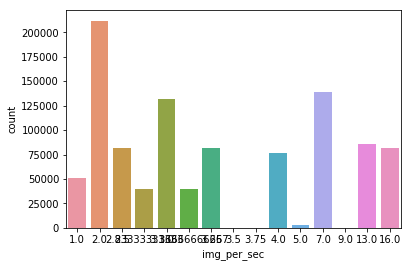

In [51]:
print(df['img_per_sec'].value_counts())
sns.countplot(df['img_per_sec'],orient='h');

0.0    920401
1.0    102790
Name: is_open, dtype: int64


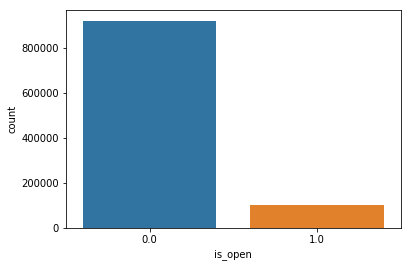

In [43]:
print(df['is_open'].value_counts())
sns.countplot(df['is_open']);

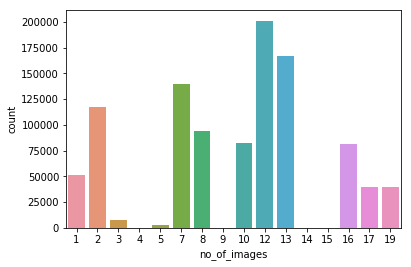

In [38]:
sns.countplot(df['no_of_images']);

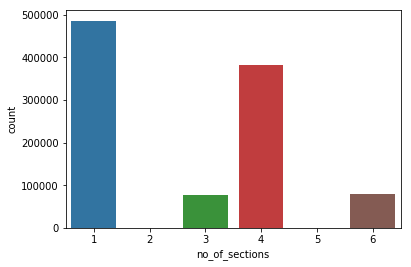

In [39]:
sns.countplot(df['no_of_sections']);

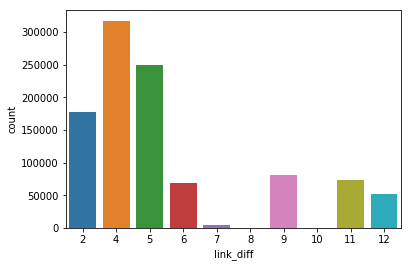

In [37]:
sns.countplot(df['link_diff']);

In [81]:
train_cats(df)

In [82]:
apply_cats(test, df)

In [87]:
df.drop(['id', 'user_id'], axis=1, inplace=True);
test.drop(['id', 'user_id'], axis=1, inplace=True);

In [88]:
df.head(1)

,campaign_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,link_diff_%,img_per_section,av_links
0,42,2017.0,1.0,2.0,9.0,0.0,9.0,False,False,False,...,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,9,10.227273,3.25,89.772727


In [89]:
test.head(1)

,campaign_id,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,...,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,link_diff,av_links,img_per_section,link_diff_%
0,63,2018,1,1,2,1,2,False,False,False,...,64,15,5,\r\nFebruary 2018 Newsletter\r\n \r\nDear AVia...,"AVbytes, Ultimate 2018 learning path and aweso...",http://r.newsletters.analyticsvidhya.com/7whsu...,4,94.117647,3.0,5.882353


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023217 entries, 0 to 1023216
Data columns (total 25 columns):
campaign_id              1023217 non-null int64
send_Year                1023191 non-null float64
send_Month               1023191 non-null float64
send_Week                1023191 non-null float64
send_Day                 1023191 non-null float64
send_Dayofweek           1023191 non-null float64
send_Dayofyear           1023191 non-null float64
send_Is_month_end        1023191 non-null category
send_Is_month_start      1023191 non-null category
send_Is_quarter_end      1023191 non-null category
send_Is_quarter_start    1023191 non-null category
send_Is_year_end         1023191 non-null category
send_Is_year_start       1023191 non-null category
communication_type       1023217 non-null category
total_links              1023217 non-null int64
no_of_internal_links     1023217 non-null int64
no_of_images             1023217 non-null int64
no_of_sections           1023217 non-n

## model

In [177]:
df_raw.get_ftype_counts()

bool:dense         6
category:dense     1
float64:dense      7
int64:dense       16
uint8:dense       59
dtype: int64

In [180]:
df_raw['comb_id'] = df_raw['user_id']*100+ df_raw['campaign_id'];
test['comb_id'] = test['user_id']*100+ test['campaign_id'];

In [181]:
df_raw.drop(['id','user_id','campaign_id'], axis=1,inplace=True);
test.drop(['id','user_id','campaign_id'], axis=1,inplace=True);

In [186]:
test.head(1)

,send_Year,send_Month,send_Week,send_Day,send_Dayofweek,send_Dayofyear,send_Is_month_end,send_Is_month_start,send_Is_quarter_end,send_Is_quarter_start,...,code_email_url_7wrjo7b5p4c,code_email_url_7ww0uvb5p4c,code_email_url_7wx2s7b5p4c,code_email_url_7wxlqvb5p4c,code_email_url_7wxv87b5p4c,code_email_url_7wz6mvb5p4c,code_email_url_7wzpljb5p4c,code_email_url_7x08k7b5p4c,code_email_url_o7ohwml8lxh,comb_id
0,2018,1,1,2,1,2,False,False,False,False,...,0,0,0,0,0,0,0,0,0,12271563


In [188]:
df_raw.drop(['is_click'],axis=1,inplace=True)
df_raw.drop('is_open',axis=1,inplace=True)

In [144]:
categorical_features_indices = np.where(df_raw.dtypes == 'category')[0]

In [145]:
categorical_features_indices

array([], dtype=int64)

In [195]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.preprocessing import StandardScaler
df_raw_scaled = StandardScaler().fit_transform(df_raw[:])
test_scaled = StandardScaler().fit_transform(test[:])

In [202]:
X_train, X_validation, y_train, y_validation = train_test_split(df_raw, y_target, train_size=0.8, random_state=17)
lr = LogisticRegression(C=1, random_state=17, solver='lbfgs',class_weight='balanced',n_jobs=-1,max_iter=2000).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [203]:
preds = lr.predict_proba(test_scaled)

In [212]:
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=1000, depth=10,learning_rate=0.01, loss_function='CrossEntropy')
model.fit(X_train, y_train,eval_set=(X_validation, y_validation))

0:	learn: 0.6718602	test: 0.6718565	best: 0.6718565 (0)	total: 1.35s	remaining: 22m 31s
1:	learn: 0.6513260	test: 0.6513192	best: 0.6513192 (1)	total: 2.24s	remaining: 18m 38s
2:	learn: 0.6314951	test: 0.6314901	best: 0.6314901 (2)	total: 3.39s	remaining: 18m 48s
3:	learn: 0.6124003	test: 0.6123970	best: 0.6123970 (3)	total: 4.46s	remaining: 18m 30s
4:	learn: 0.5937470	test: 0.5937406	best: 0.5937406 (4)	total: 5.64s	remaining: 18m 41s
5:	learn: 0.5757953	test: 0.5757863	best: 0.5757863 (5)	total: 7.12s	remaining: 19m 39s
6:	learn: 0.5584940	test: 0.5584821	best: 0.5584821 (6)	total: 7.94s	remaining: 18m 46s
7:	learn: 0.5416949	test: 0.5416788	best: 0.5416788 (7)	total: 9.58s	remaining: 19m 47s
8:	learn: 0.5255072	test: 0.5254872	best: 0.5254872 (8)	total: 10.8s	remaining: 19m 47s
9:	learn: 0.5099054	test: 0.5098842	best: 0.5098842 (9)	total: 11.7s	remaining: 19m 21s
10:	learn: 0.4948499	test: 0.4948265	best: 0.4948265 (10)	total: 12.7s	remaining: 19m
11:	learn: 0.4802808	test: 0.48025

92:	learn: 0.0999056	test: 0.0998799	best: 0.0998799 (92)	total: 2m 4s	remaining: 20m 12s
93:	learn: 0.0989993	test: 0.0989737	best: 0.0989737 (93)	total: 2m 6s	remaining: 20m 14s
94:	learn: 0.0981298	test: 0.0981042	best: 0.0981042 (94)	total: 2m 7s	remaining: 20m 15s
95:	learn: 0.0972874	test: 0.0972621	best: 0.0972621 (95)	total: 2m 8s	remaining: 20m 13s
96:	learn: 0.0964785	test: 0.0964540	best: 0.0964540 (96)	total: 2m 9s	remaining: 20m 5s
97:	learn: 0.0956826	test: 0.0956591	best: 0.0956591 (97)	total: 2m 10s	remaining: 20m 5s
98:	learn: 0.0949175	test: 0.0948944	best: 0.0948944 (98)	total: 2m 11s	remaining: 20m
99:	learn: 0.0941611	test: 0.0941379	best: 0.0941379 (99)	total: 2m 13s	remaining: 19m 59s
100:	learn: 0.0934393	test: 0.0934166	best: 0.0934166 (100)	total: 2m 15s	remaining: 20m 1s
101:	learn: 0.0927336	test: 0.0927111	best: 0.0927111 (101)	total: 2m 16s	remaining: 20m
102:	learn: 0.0920425	test: 0.0920198	best: 0.0920198 (102)	total: 2m 17s	remaining: 19m 54s
103:	lear

181:	learn: 0.0700315	test: 0.0700148	best: 0.0700148 (181)	total: 4m	remaining: 18m 2s
182:	learn: 0.0699475	test: 0.0699308	best: 0.0699308 (182)	total: 4m 1s	remaining: 18m
183:	learn: 0.0698633	test: 0.0698467	best: 0.0698467 (183)	total: 4m 3s	remaining: 18m
184:	learn: 0.0697837	test: 0.0697675	best: 0.0697675 (184)	total: 4m 4s	remaining: 17m 57s
185:	learn: 0.0697038	test: 0.0696878	best: 0.0696878 (185)	total: 4m 5s	remaining: 17m 55s
186:	learn: 0.0696222	test: 0.0696060	best: 0.0696060 (186)	total: 4m 7s	remaining: 17m 55s
187:	learn: 0.0695445	test: 0.0695285	best: 0.0695285 (187)	total: 4m 8s	remaining: 17m 53s
188:	learn: 0.0694721	test: 0.0694560	best: 0.0694560 (188)	total: 4m 9s	remaining: 17m 51s
189:	learn: 0.0694006	test: 0.0693847	best: 0.0693847 (189)	total: 4m 10s	remaining: 17m 49s
190:	learn: 0.0693305	test: 0.0693145	best: 0.0693145 (190)	total: 4m 11s	remaining: 17m 46s
191:	learn: 0.0692609	test: 0.0692446	best: 0.0692446 (191)	total: 4m 12s	remaining: 17m 4

270:	learn: 0.0667102	test: 0.0666937	best: 0.0666937 (270)	total: 5m 59s	remaining: 16m 7s
271:	learn: 0.0666982	test: 0.0666820	best: 0.0666820 (271)	total: 6m 1s	remaining: 16m 6s
272:	learn: 0.0666859	test: 0.0666700	best: 0.0666700 (272)	total: 6m 2s	remaining: 16m 6s
273:	learn: 0.0666755	test: 0.0666596	best: 0.0666596 (273)	total: 6m 3s	remaining: 16m 2s
274:	learn: 0.0666637	test: 0.0666478	best: 0.0666478 (274)	total: 6m 5s	remaining: 16m 2s
275:	learn: 0.0666518	test: 0.0666361	best: 0.0666361 (275)	total: 6m 6s	remaining: 16m 1s
276:	learn: 0.0666417	test: 0.0666261	best: 0.0666261 (276)	total: 6m 7s	remaining: 16m
277:	learn: 0.0666312	test: 0.0666155	best: 0.0666155 (277)	total: 6m 8s	remaining: 15m 57s
278:	learn: 0.0666204	test: 0.0666049	best: 0.0666049 (278)	total: 6m 10s	remaining: 15m 57s
279:	learn: 0.0666101	test: 0.0665946	best: 0.0665946 (279)	total: 6m 12s	remaining: 15m 57s
280:	learn: 0.0665998	test: 0.0665840	best: 0.0665840 (280)	total: 6m 13s	remaining: 15

359:	learn: 0.0661978	test: 0.0661850	best: 0.0661850 (359)	total: 7m 56s	remaining: 14m 6s
360:	learn: 0.0661950	test: 0.0661823	best: 0.0661823 (360)	total: 7m 57s	remaining: 14m 5s
361:	learn: 0.0661934	test: 0.0661808	best: 0.0661808 (361)	total: 7m 58s	remaining: 14m 2s
362:	learn: 0.0661916	test: 0.0661791	best: 0.0661791 (362)	total: 7m 59s	remaining: 14m 1s
363:	learn: 0.0661894	test: 0.0661769	best: 0.0661769 (363)	total: 8m	remaining: 14m
364:	learn: 0.0661875	test: 0.0661749	best: 0.0661749 (364)	total: 8m 1s	remaining: 13m 57s
365:	learn: 0.0661851	test: 0.0661724	best: 0.0661724 (365)	total: 8m 2s	remaining: 13m 56s
366:	learn: 0.0661829	test: 0.0661704	best: 0.0661704 (366)	total: 8m 4s	remaining: 13m 55s
367:	learn: 0.0661810	test: 0.0661684	best: 0.0661684 (367)	total: 8m 5s	remaining: 13m 54s
368:	learn: 0.0661791	test: 0.0661666	best: 0.0661666 (368)	total: 8m 7s	remaining: 13m 52s
369:	learn: 0.0661775	test: 0.0661650	best: 0.0661650 (369)	total: 8m 7s	remaining: 13m

448:	learn: 0.0660943	test: 0.0660840	best: 0.0660840 (448)	total: 9m 50s	remaining: 12m 4s
449:	learn: 0.0660936	test: 0.0660833	best: 0.0660833 (449)	total: 9m 51s	remaining: 12m 3s
450:	learn: 0.0660933	test: 0.0660831	best: 0.0660831 (450)	total: 9m 52s	remaining: 12m 1s
451:	learn: 0.0660922	test: 0.0660826	best: 0.0660826 (451)	total: 9m 54s	remaining: 12m
452:	learn: 0.0660917	test: 0.0660822	best: 0.0660822 (452)	total: 9m 54s	remaining: 11m 58s
453:	learn: 0.0660913	test: 0.0660817	best: 0.0660817 (453)	total: 9m 55s	remaining: 11m 56s
454:	learn: 0.0660908	test: 0.0660812	best: 0.0660812 (454)	total: 9m 56s	remaining: 11m 54s
455:	learn: 0.0660903	test: 0.0660806	best: 0.0660806 (455)	total: 9m 58s	remaining: 11m 53s
456:	learn: 0.0660896	test: 0.0660803	best: 0.0660803 (456)	total: 9m 59s	remaining: 11m 52s
457:	learn: 0.0660892	test: 0.0660799	best: 0.0660799 (457)	total: 10m	remaining: 11m 51s
458:	learn: 0.0660889	test: 0.0660797	best: 0.0660797 (458)	total: 10m 2s	remain

536:	learn: 0.0660599	test: 0.0660577	best: 0.0660577 (536)	total: 11m 40s	remaining: 10m 4s
537:	learn: 0.0660598	test: 0.0660576	best: 0.0660576 (537)	total: 11m 41s	remaining: 10m 2s
538:	learn: 0.0660597	test: 0.0660575	best: 0.0660575 (538)	total: 11m 42s	remaining: 10m
539:	learn: 0.0660597	test: 0.0660575	best: 0.0660575 (539)	total: 11m 43s	remaining: 9m 58s
540:	learn: 0.0660590	test: 0.0660576	best: 0.0660575 (539)	total: 11m 44s	remaining: 9m 58s
541:	learn: 0.0660589	test: 0.0660576	best: 0.0660575 (539)	total: 11m 45s	remaining: 9m 56s
542:	learn: 0.0660589	test: 0.0660576	best: 0.0660575 (539)	total: 11m 46s	remaining: 9m 54s
543:	learn: 0.0660586	test: 0.0660575	best: 0.0660575 (543)	total: 11m 47s	remaining: 9m 53s
544:	learn: 0.0660586	test: 0.0660575	best: 0.0660575 (543)	total: 11m 48s	remaining: 9m 51s
545:	learn: 0.0660581	test: 0.0660573	best: 0.0660573 (545)	total: 11m 49s	remaining: 9m 49s
546:	learn: 0.0660580	test: 0.0660571	best: 0.0660571 (546)	total: 11m 51

625:	learn: 0.0660422	test: 0.0660515	best: 0.0660514 (612)	total: 13m 34s	remaining: 8m 6s
626:	learn: 0.0660418	test: 0.0660515	best: 0.0660514 (612)	total: 13m 35s	remaining: 8m 5s
627:	learn: 0.0660417	test: 0.0660513	best: 0.0660513 (627)	total: 13m 37s	remaining: 8m 4s
628:	learn: 0.0660413	test: 0.0660515	best: 0.0660513 (627)	total: 13m 38s	remaining: 8m 3s
629:	learn: 0.0660411	test: 0.0660516	best: 0.0660513 (627)	total: 13m 40s	remaining: 8m 2s
630:	learn: 0.0660408	test: 0.0660514	best: 0.0660513 (627)	total: 13m 42s	remaining: 8m
631:	learn: 0.0660408	test: 0.0660514	best: 0.0660513 (627)	total: 13m 42s	remaining: 7m 59s
632:	learn: 0.0660407	test: 0.0660514	best: 0.0660513 (627)	total: 13m 43s	remaining: 7m 57s
633:	learn: 0.0660407	test: 0.0660515	best: 0.0660513 (627)	total: 13m 44s	remaining: 7m 55s
634:	learn: 0.0660406	test: 0.0660514	best: 0.0660513 (627)	total: 13m 46s	remaining: 7m 54s
635:	learn: 0.0660399	test: 0.0660514	best: 0.0660513 (627)	total: 13m 47s	rema

714:	learn: 0.0660264	test: 0.0660490	best: 0.0660488 (695)	total: 15m 31s	remaining: 6m 11s
715:	learn: 0.0660262	test: 0.0660489	best: 0.0660488 (695)	total: 15m 32s	remaining: 6m 9s
716:	learn: 0.0660261	test: 0.0660488	best: 0.0660488 (695)	total: 15m 33s	remaining: 6m 8s
717:	learn: 0.0660261	test: 0.0660488	best: 0.0660488 (695)	total: 15m 35s	remaining: 6m 7s
718:	learn: 0.0660260	test: 0.0660488	best: 0.0660488 (695)	total: 15m 36s	remaining: 6m 6s
719:	learn: 0.0660257	test: 0.0660489	best: 0.0660488 (695)	total: 15m 38s	remaining: 6m 5s
720:	learn: 0.0660254	test: 0.0660489	best: 0.0660488 (695)	total: 15m 40s	remaining: 6m 3s
721:	learn: 0.0660253	test: 0.0660490	best: 0.0660488 (695)	total: 15m 41s	remaining: 6m 2s
722:	learn: 0.0660253	test: 0.0660490	best: 0.0660488 (695)	total: 15m 41s	remaining: 6m
723:	learn: 0.0660251	test: 0.0660490	best: 0.0660488 (695)	total: 15m 43s	remaining: 5m 59s
724:	learn: 0.0660249	test: 0.0660489	best: 0.0660488 (695)	total: 15m 44s	remain

803:	learn: 0.0660152	test: 0.0660473	best: 0.0660467 (788)	total: 17m 26s	remaining: 4m 15s
804:	learn: 0.0660149	test: 0.0660474	best: 0.0660467 (788)	total: 17m 27s	remaining: 4m 13s
805:	learn: 0.0660146	test: 0.0660474	best: 0.0660467 (788)	total: 17m 29s	remaining: 4m 12s
806:	learn: 0.0660145	test: 0.0660474	best: 0.0660467 (788)	total: 17m 29s	remaining: 4m 11s
807:	learn: 0.0660141	test: 0.0660474	best: 0.0660467 (788)	total: 17m 31s	remaining: 4m 9s
808:	learn: 0.0660140	test: 0.0660473	best: 0.0660467 (788)	total: 17m 32s	remaining: 4m 8s
809:	learn: 0.0660140	test: 0.0660473	best: 0.0660467 (788)	total: 17m 34s	remaining: 4m 7s
810:	learn: 0.0660137	test: 0.0660471	best: 0.0660467 (788)	total: 17m 35s	remaining: 4m 6s
811:	learn: 0.0660136	test: 0.0660471	best: 0.0660467 (788)	total: 17m 37s	remaining: 4m 4s
812:	learn: 0.0660136	test: 0.0660471	best: 0.0660467 (788)	total: 17m 38s	remaining: 4m 3s
813:	learn: 0.0660134	test: 0.0660471	best: 0.0660467 (788)	total: 17m 39s	r

892:	learn: 0.0660039	test: 0.0660479	best: 0.0660467 (788)	total: 19m 17s	remaining: 2m 18s
893:	learn: 0.0660036	test: 0.0660477	best: 0.0660467 (788)	total: 19m 19s	remaining: 2m 17s
894:	learn: 0.0660035	test: 0.0660479	best: 0.0660467 (788)	total: 19m 20s	remaining: 2m 16s
895:	learn: 0.0660033	test: 0.0660479	best: 0.0660467 (788)	total: 19m 21s	remaining: 2m 14s
896:	learn: 0.0660032	test: 0.0660478	best: 0.0660467 (788)	total: 19m 23s	remaining: 2m 13s
897:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 25s	remaining: 2m 12s
898:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 26s	remaining: 2m 11s
899:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 26s	remaining: 2m 9s
900:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 28s	remaining: 2m 8s
901:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 29s	remaining: 2m 7s
902:	learn: 0.0660030	test: 0.0660478	best: 0.0660467 (788)	total: 19m 30

981:	learn: 0.0659941	test: 0.0660486	best: 0.0660467 (788)	total: 21m 8s	remaining: 23.3s
982:	learn: 0.0659941	test: 0.0660486	best: 0.0660467 (788)	total: 21m 9s	remaining: 21.9s
983:	learn: 0.0659940	test: 0.0660486	best: 0.0660467 (788)	total: 21m 10s	remaining: 20.7s
984:	learn: 0.0659940	test: 0.0660487	best: 0.0660467 (788)	total: 21m 12s	remaining: 19.4s
985:	learn: 0.0659937	test: 0.0660489	best: 0.0660467 (788)	total: 21m 13s	remaining: 18.1s
986:	learn: 0.0659936	test: 0.0660489	best: 0.0660467 (788)	total: 21m 15s	remaining: 16.8s
987:	learn: 0.0659932	test: 0.0660491	best: 0.0660467 (788)	total: 21m 17s	remaining: 15.5s
988:	learn: 0.0659932	test: 0.0660491	best: 0.0660467 (788)	total: 21m 17s	remaining: 14.2s
989:	learn: 0.0659928	test: 0.0660491	best: 0.0660467 (788)	total: 21m 19s	remaining: 12.9s
990:	learn: 0.0659927	test: 0.0660490	best: 0.0660467 (788)	total: 21m 20s	remaining: 11.6s
991:	learn: 0.0659924	test: 0.0660491	best: 0.0660467 (788)	total: 21m 21s	remaini

In [217]:
prediction_proba = model.predict_proba(test)

In [219]:
prediction_proba[:,1]

array([ 0.01567,  0.01569,  0.0155 , ...,  0.02772,  0.02941,  0.02941])

In [204]:
def make_submission(probs):
    sample = pd.read_csv(f'{PATH}//sample_submission.csv')
    submit = sample.copy()
    submit['is_click'] = probs
    return submit

In [221]:
submit = make_submission(prediction_proba[:,1])

In [222]:
submit.head(2)

,id,is_click
0,63_122715,0.015673
1,56_76206,0.015691


In [223]:
submit.to_csv(PATH + '//logistic_reg_sub2.csv', index=False)

In [201]:
from  sklearn.metrics  import  mean_squared_error

from  sklearn.preprocessing  import  StandardScaler 
from  sklearn.model_selection  import  GridSearchCV
from  sklearn.linear_model  import   LogisticRegression 
from  sklearn.linear_model  import   LinearRegression 
from  sklearn.neighbors  import   KNeighborsRegressor 
from  sklearn.ensemble  import   RandomForestRegressor 
from  sklearn.ensemble  import   GradientBoostingRegressor 
from  sklearn.ensemble  import   AdaBoostRegressor 
from  sklearn.svm  import  LinearSVR

from  sklearn.learning_curve  import  learning_curve

from  scipy  import  stats

In [203]:
X_train, X_validation, y_train, y_validation = train_test_split(df_raw, y_target, train_size=0.8, random_state=17)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
# We teach the basic random forest for the selection of characteristics 
rfc_base = RandomForestRegressor ( n_estimators = 500 , random_state = 42,n_jobs=-1 ) 
rfc_base . fit ( X_train , y_train )

In [ ]:
# Display the significance of features 
features  =  pd . DataFrame ( rfc_base.feature_importances_ ,  index = X_train . columns , 
                        columns = [ 'Importance' ]) . sort_values ([ 'Importance' ],  ascending = False ) 
features

In [ ]:
# Let's 
start choosing a model # List of regressors regressors 
= [ LinearRegression (), GradientBoostingRegressor ( random_state = 17 ), RandomForestRegressor ( random_state = 17 ), LinearSVR ( random_state = 17 )]

regressor_name = [ 'LinearRegression' , 'GradientBoostingRegressor' , 'RandomForestRegressor' , 'LinearSVR' ]  

In [ ]:
# Parameters to the regressors 
scores  =  [] 
fits  =  [] 
linear_params  =  { 'normalize' :  ( True ,  False )} 
gbr_params  =  { 'n_estimators' :  [ 100 ,  300 ,  500 ], 
              'learning_rate' :( 0.1 ,  0.5 ,  1 ), 
              'max_depth' :  list ( range ( 3 ,  10 ,  2 )),  
              'min_samples_leaf':  list ( range ( 10 ,  31 ,  10 ))} 
forest_params  =  { 'n_estimators' :  [ 100 ,  300 ,  500 ],  
                 'max_depth' :  list ( range ( 3 ,  10 ,  2 )),  
                 'min_samples_leaf' :  list ( range ( 10 ,  31 ,  10 ))}

svm_params  =  { 'loss'  :  ( 'epsilon_insensitive' ,  'squared_epsilon_insensitive' ),  'C' :  ( . 5 ,  1 ,  2 )} 
params  =  [ linear_params ,  gbr_params ,  forest_params ,  svm_params ]

In [ ]:
# We search the regressors parameters in search of the best (on 5 folds) 
np . random . seed ( 42 ) 
for  i ,  each_regressor  in  enumerate ( regressors ): 
    reg  =  each_regressor 
    reg_params  =  params [ i ] 
    grid  =  GridSearchCV ( reg ,  reg_params ,  
                        cv = 5 , 
                        scoring = 'neg_mean_squared_error' , 
                        n_jobs = -1 )
    grid . fit ( X_train ,  y_train ) 
    fits . append ( grid . best_params_ ) 
    reg_best_score  =  grid . best_score_ 
    scores . append ( reg_best_score ) 
    print ( regressor_name [ i ],  - reg_best_score ,  " \ n " ,  grid . best_params_ ,  " \ n " )

In [ ]:
# In-depth selection of hyperparameters for a random forest 
np . random . seed ( 42 ) 
forest_params_deep  =  { 'n_estimators' :  [ 100 , 150 , 200 , 300 , 500 ],  #n_estimators - number of trees in the random forest 
                 'max_depth' :  list ( range ( 3 ,  13 ,  2 )),  #max_depth - maximum depth of the tree 
                 'min_samples_leaf' :  list ( range( 5 ,  30 ,  5 ))} #min_samples_leaf - the minimum number of objects in the tree sheet. 
rfr = RandomForestRegressor ( random_state = 42 ) 
grid_rfr  =  GridSearchCV ( rfr ,  forest_params_deep ,  
                        cv = 5 , 
                        scoring = 'neg_mean_squared_error' , 
                        n_jobs = -1 )

In [ ]:
grid_rfr . fit ( X_train ,  y_train )

In [ ]:
# The result is even better! 
print ( - grid_rfr . best_score_ , ' \ n ' , grid_rfr . best_params_ )

## 25/03/18

,0
id,42_14051
user_id,14051
campaign_id,42
is_open,0
is_click,0
send_Year,2017
send_Month,1
send_Week,2
send_Day,9
send_Dayofweek,0
